# Imports

In [1]:
#!pip install fastcluster

In [2]:
import gzip
import pickle
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../../src/")
from convertor import convert
from preprocessing import get_target, preprocessing
from numpy.linalg import norm

2024-06-21 13:47:35.739809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
plant_list = [
    "A.thaliana",
    "C.sinensis",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "O.sativa",
    "S.bicolor",
    "T.aestivum",
    "Z.mays"
]

## load datasets

In [4]:
data = []
for plant in plant_list:
    pos = pd.read_csv(f'../../experiment/{plant}/positive/Result/result_level1_filter.csv')
    data.append(pos)                
    neg = pd.read_csv(f'../../experiment/{plant}/negative/Result/result_level1_filter.csv')
    data.append(neg)
    
    
data = pd.concat(data)
data.shape

(62007, 183)

## preprocess

In [5]:
data = convert(data)
[features, mu, std]  = preprocessing(data, None, None, True)

/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### column names fix

In [6]:
rm_list = [
    "total num of nonmatching positions",
    "acceptable num for hit locations in bulges or loops",
    "max mismatch in hit region",
    "bulge",
    "max bulge in loop proximal",
    "max loop in loop proximal",
    "max mismatch in loop proximal",
    "mismatch",
    "max mismatch in loop distal",
    "max loop in loop distal",
    "max bulge in loop distal",
    "internal loop",
    "max bulge in proximal border line",
    "max bulge in distal border line",
    "max bulge in hit region",
    "max loop in distal border line",
    "max loop in proximal border line",
    "max mismatch in proximal border line",
    "max mismatch in distal border line",
    0,
    1,    
]

for c in rm_list:
    del features[c]

In [7]:
mapper = {
    "boi delta G": "BOI delta G",
    "precursor delta G": "Precursor delta G",
    "number loop in hit region": "Number of internal loops in the hit region",
    "max loop in hit region": "Maximum loop size in the hit region",
    "sum loop in hit region": "Sum of hit positions in loops ",
    "total num of positions in bulges and loops":
    "Number of hit positions in bulges and loops (D1 definition)",
    "acceptable num for unmatched locations in hit region * 2":
    "Number of unmatched positions in the hit region (D2 definition)",
    "acceptable num for unmatched locations in hit region":
    "Number of unmatched positions in the hit region (D1 definition)",
    "acceptable num for unmatched locations in hit region mayers * 2":
    "Number of unmatched positions in the hit region (M2 definition)",
    "acceptable num for hit locations in bulges or loops mayers":
    "Number of hit positions in bulges and loops (M1 definition)",
    "acceptable num for unmatched locations in hit region mayers":
    "Number of unmatched positions in the hit region (M1 definition)",
    "hit complementarity percentage": "Hit complementarity percentage",
    "boi AMFE": "BOI AMFE",
    "precursor AMFE": "Precursor AMFE",
    "flanking MFEI": "Flanking MFEI",
    "boi MFEI": "BOI MFEI",
    "precursor MFEI": "Precursor MFEI",
    "number mismatch in hit region":
    "Number of mismatched segments in hit region",
    "total num of mismached positions":
    "Total num of mismatched positions in BOI",
    "sum mismatch in hit region": "Sum of mismatched positions in hit region",
    "number bulge in loop proximal":
    "Number of bulges in loop proximal region",
    "sum bulge in loop proximal":
    "Sum of positions in bulges in loop proximal region",
    "mature duplex involvement in apical loop":
    "Number of Hit/Hit* positions involved in the apical loop",
    "num of linking residues":
    "Number of linking residues between hit and hit*",
    "number of terminal structures": "Number of terminal structures",
    "number loop in loop proximal":
    "Sum of positions in loops in loop proximal region",
    "sum loop in loop proximal": "Number of loops in loop proximal",
    "primary stem length": "Primary stem length",
    "primary stem corrected length": "Primary stem adjusted length",
    "Loop proximal junction distance":
    "Loop proximal distance from the first junction",
    "number mismatch in loop proximal":
    "Number of mismatched segments in loop proximal region",
    "sum mismatch in loop proximal":
    "Sum of mismatched positions in loop proximal region",
    "base structure corrected length": "Base structure adjusted length",
    "Loop distal junction distance":
    "Loop distal distance from the first junction ",
    "number mismatch in loop distal":
    "Number of mismatched segments in loop distal region",
    "sum mismatch in loop distal":
    "Sum of mismatched positions in loop distal region",
    "number loop in loop distal": "Number of loops in loop distal region",
    "sum loop in loop distal":
    "Sum of positions in loops in loop distal region",
    "number bulge in loop distal": "Number of bulges in loop distal region",
    "sum bulge in loop distal":
    "Sum of positions in bulges in loop distal region",
    "number bulge in proximal border line":
    "Number of bulges in proximal border lines",
    "sum bulge in proximal border line":
    "Number of bulged positions in proximal border lines",
    "number bulge in distal border line":
    "Number of bulges in distal border lines",
    "sum bulge in distal border line":
    "Number of bulged positions in distal border lines",
    "number bulge in hit region": "Number of bulged segments in hit region",
    "sum bulge in hit region": "Sum of bulged positions in hit region",
    "number loop in distal border line":
    "Number of internal loops in distal border lines",
    "sum loop in distal border line":
    "Number of positions in loops in distal border lines",
    "branch#1 apical loop size":
    "terminal loop size of the branch in branched structures ",
    "sum of residue in terminal loop": "Sum of positions in terminal loop",
    "number loop in proximal border line":
    "Number of internal loops in proximal border lines",
    "sum loop in proximal border line":
    "Number of positions in loops in proximal border line",
    "flanking GC content": "Flanking GC content",
    "boi GC content": "BOI GC content",
    "precursor gc content": "Precursor GC content",
    "sum mismatch in proximal border line":
    "Number of mismatched positions in proximal border line",
    "number mismatch in proximal border line":
    "Number of mismatched segments in proximal border lines",
    "sum mismatch in distal border line":
    "Number of mismatched positions in distal border line",
    "number mismatch in distal border line":
    "Number of mismatched segments in distal border line",
    "hit len": "Hit length",
    "hit GC content": "Hit GC content",
    "start_-3_0": "Start_Position(-3)==A",
    "start_-3_1": "Start_Position(-3)==C",
    "start_-3_2": "Start_Position(-3)==G",
    "start_-3_3": "Start_Position(-3)==T",
    "start_-3_4": "Start_Position(-3_complementary)==A",
    "start_-3_5": "Start_Position(-3_complementary)==C",
    "start_-3_6": "Start_Position(-3_complementary)==G",
    "start_-3_7": "Start_Position(-3_complementary)==T",
    "start_-2_0": "Start_Position(-2)==A",
    "start_-2_1": "Start_Position(-2)==C",
    "start_-2_2": "Start_Position(-2)==G",
    "start_-2_3": "Start_Position(-2)==T",
    "start_-2_4": "Start_Position(-2_complementary)==A",
    "start_-2_5": "Start_Position(-2_complementary)==C",
    "start_-2_6": "Start_Position(-2_complementary)==G",
    "start_-2_7": "Start_Position(-2_complementary)==T",
    "start_-1_0": "Start_Position(-1)==A",
    "start_-1_1": "Start_Position(-1)==C",
    "start_-1_2": "Start_Position(-1)==G",
    "start_-1_3": "Start_Position(-1)==T",
    "start_-1_4": "Start_Position(-1_complementary)==A",
    "start_-1_5": "Start_Position(-1_complementary)==C",
    "start_-1_6": "Start_Position(-1_complementary)==G",
    "start_-1_7": "Start_Position(-1_complementary)==T",
    "start__0": "Start_Position()==A",
    "start__1": "Start_Position()==C",
    "start__2": "Start_Position()==G",
    "start__3": "Start_Position()==T",
    "start__4": "Start_Position(_complementary)==A",
    "start__5": "Start_Position(_complementary)==C",
    "start__6": "Start_Position(_complementary)==G",
    "start__7": "Start_Position(_complementary)==T",
    "start_+1_0": "Start_Position(+1)==A",
    "start_+1_1": "Start_Position(+1)==C",
    "start_+1_2": "Start_Position(+1)==G",
    "start_+1_3": "Start_Position(+1)==T",
    "start_+1_4": "Start_Position(+1_complementary)==A",
    "start_+1_5": "Start_Position(+1_complementary)==C",
    "start_+1_6": "Start_Position(+1_complementary)==G",
    "start_+1_7": "Start_Position(+1_complementary)==T",
    "start_+2_0": "Start_Position(+2)==A",
    "start_+2_1": "Start_Position(+2)==C",
    "start_+2_2": "Start_Position(+2)==G",
    "start_+2_3": "Start_Position(+2)==T",
    "start_+2_4": "Start_Position(+2_complementary)==A",
    "start_+2_5": "Start_Position(+2_complementary)==C",
    "start_+2_6": "Start_Position(+2_complementary)==G",
    "start_+2_7": "Start_Position(+2_complementary)==T",
    "end_-3_0": "End_Position(-3)==A",
    "end_-3_1": "End_Position(-3)==C",
    "end_-3_2": "End_Position(-3)==G",
    "end_-3_3": "End_Position(-3)==T",
    "end_-3_4": "End_Position(-3_complementary)==A",
    "end_-3_5": "End_Position(-3_complementary)==C",
    "end_-3_6": "End_Position(-3_complementary)==G",
    "end_-3_7": "End_Position(-3_complementary)==T",
    "end_-2_0": "End_Position(-2)==A",
    "end_-2_1": "End_Position(-2)==C",
    "end_-2_2": "End_Position(-2)==G",
    "end_-2_3": "End_Position(-2)==T",
    "end_-2_4": "End_Position(-2_complementary)==A",
    "end_-2_5": "End_Position(-2_complementary)==C",
    "end_-2_6": "End_Position(-2_complementary)==G",
    "end_-2_7": "End_Position(-2_complementary)==T",
    "end_-1_0": "End_Position(-1)==A",
    "end_-1_1": "End_Position(-1)==C",
    "end_-1_2": "End_Position(-1)==G",
    "end_-1_3": "End_Position(-1)==T",
    "end_-1_4": "End_Position(-1_complementary)==A",
    "end_-1_5": "End_Position(-1_complementary)==C",
    "end_-1_6": "End_Position(-1_complementary)==G",
    "end_-1_7": "End_Position(-1_complementary)==T",
    "end__0": "End_Position()==A",
    "end__1": "End_Position()==C",
    "end__2": "End_Position()==G",
    "end__3": "End_Position()==T",
    "end__4": "End_Position(_complementary)==A",
    "end__5": "End_Position(_complementary)==C",
    "end__6": "End_Position(_complementary)==G",
    "end__7": "End_Position(_complementary)==T",
    "end_+1_0": "End_Position(+1)==A",
    "end_+1_1": "End_Position(+1)==C",
    "end_+1_2": "End_Position(+1)==G",
    "end_+1_3": "End_Position(+1)==T",
    "end_+1_4": "End_Position(+1_complementary)==A",
    "end_+1_5": "End_Position(+1_complementary)==C",
    "end_+1_6": "End_Position(+1_complementary)==G",
    "end_+1_7": "End_Position(+1_complementary)==T",
    "end_+2_0": "End_Position(+2)==A",
    "end_+2_1": "End_Position(+2)==C",
    "end_+2_2": "End_Position(+2)==G",
    "end_+2_3": "End_Position(+2)==T",
    "end_+2_4": "End_Position(+2_complementary)==A",
    "end_+2_5": "End_Position(+2_complementary)==C",
    "end_+2_6": "End_Position(+2_complementary)==G",
    "end_+2_7": "End_Position(+2_complementary)==T",
    "connectivity hit start-3": "Hit start -3 connectivity",
    "connectivity hit end-3": "Hit end -3 connectivity",
    "connectivity hit start-2": "Hit start -2 connectivity",
    "connectivity hit end-2": "Hit end -2 connectivity",
    "connectivity hit start-1": "Hit start -1 connectivity",
    "connectivity hit end-1": "Hit end -1 connectivity",
    "connectivity hit start": "Hit start connectivity",
    "connectivity hit end": "Hit end connectivity",
    "connectivity hit start+1": "Hit start +1 connectivity",
    "connectivity hit end+1": "Hit end +1 connectivity",
    "connectivity hit start+2": "Hit start +2 connectivity",
    "connectivity hit end+2": "Hit end +2 connectivity"
}
for col in features.columns:
    if col not in mapper.keys():
        print(col)
        mapper[col] = col

AAAA
AAAC
AAAG
AAAT
AACA
AACC
AACG
AACT
AAGA
AAGC
AAGG
AAGT
AATA
AATC
AATG
AATT
ACAA
ACAC
ACAG
ACAT
ACCA
ACCC
ACCG
ACCT
ACGA
ACGC
ACGG
ACGT
ACTA
ACTC
ACTG
AGAA
AGAC
AGAG
AGAT
AGCA
AGCC
AGCG
AGCT
AGGA
AGGC
AGGG
AGTA
AGTC
AGTG
ATAA
ATAC
ATAG
ATAT
ATCA
ATCC
ATCG
ATGA
ATGC
ATGG
ATTA
ATTC
ATTG
CAAA
CAAC
CAAG
CACA
CACC
CACG
CAGA
CAGC
CAGG
CATA
CATC
CATG
CCAA
CCAC
CCAG
CCCA
CCCC
CCCG
CCGA
CCGC
CCGG
CCTA
CCTC
CGAA
CGAC
CGAG
CGCA
CGCC
CGCG
CGGA
CGGC
CGTA
CGTC
CTAA
CTAC
CTAG
CTCA
CTCC
CTGA
CTGC
CTTA
CTTC
GAAA
GAAC
GACA
GACC
GAGA
GAGC
GATA
GATC
GCAA
GCAC
GCCA
GCCC
GCGA
GCGC
GCTA
GGAA
GGAC
GGCA
GGCC
GGGA
GGTA
GTAA
GTAC
GTCA
GTGA
GTTA
TAAA
TACA
TAGA
TATA
TCAA
TCCA
TCGA
TGAA
TGCA
TTAA


In [8]:
features.rename(columns=mapper, inplace=True,  errors="raise")
features

Hit length  Flanking GC content  Flanking MFEI  Hit GC content  \
0       -0.393586            -0.656432       0.915890        0.213830   
1       -0.393586            -0.656432       0.915890        0.213830   
2       -0.393586            -0.656432       0.915890        0.213830   
3       -0.393586            -0.656432       0.915890        0.213830   
4       -0.393586            -0.656432       0.915890        0.213830   
...           ...                  ...            ...             ...   
62002   -0.393586            -1.042806      -0.304831       -0.675912   
62003    0.289513            -0.038234      -0.175033        0.086724   
62004   -0.393586            -1.120081      -0.692684       -2.201184   
62005    0.289513            -0.192784      -0.502087       -0.803018   
62006    0.289513            -0.192784      -0.467797       -0.803018   

       Hit complementarity percentage  \
0                            1.137939   
1                            1.137939   
2                            1.137939   
3                            1.137939   
4                            1.137939   
...                               ...   
62002                        0.126369   
62003                        0.179610   
62004                       -0.352795   
62005                       -1.524086   
62006                       -0.778719   

       Number of linking residues between hit and hit*  BOI GC content  \
0                                             0.012031       -0.536283   
1                                             0.012031       -0.536283   
2                                             0.012031       -0.536283   
3                                             0.012031       -0.536283   
4                                             0.012031       -0.536283   
...                                                ...             ...   
62002                                         0.460266       -1.031545   
62003                                         0.028039        0.171233   
62004                                        -0.852422       -1.031545   
62005                                        -0.692338       -0.253277   
62006                                        -0.420195       -0.253277   

       BOI delta G  BOI AMFE  BOI MFEI  ...  Hit start -2 connectivity  \
0        -0.193246  0.242183  0.494460  ...                        1.0   
1        -0.193246  0.242183  0.494460  ...                        1.0   
2        -0.193246  0.242183  0.494460  ...                        1.0   
3        -0.193246  0.242183  0.494460  ...                        1.0   
4        -0.193246  0.242183  0.494460  ...                        1.0   
...            ...       ...       ...  ...                        ...   
62002     0.617511 -0.995837 -0.392990  ...                        1.0   
62003     0.226136  0.264179 -0.019024  ...                        0.0   
62004     1.063576 -1.102538 -0.518474  ...                        0.0   
62005     0.685295 -0.752743 -0.618036  ...                        0.0   
62006     0.736878 -0.685486 -0.559175  ...                        0.0   

       Hit end -2 connectivity  Hit start -1 connectivity  \
0                          1.0                        1.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          1.0                        1.0   
4                          1.0                        1.0   
...                        ...                        ...   
62002                      0.0                        1.0   
62003                      1.0                        0.0   
62004                      0.0                        1.0   
62005                      0.0                        1.0   
62006                      0.0                        1.0   

       Hit end -1 connectivity  Hit start connectivity  Hit end connectivity  \
0                          1.0                

In [9]:
""" 
for t,T in [["start", "Start"], ["end", "End"]]:
    for p in ["-3","-2","-1","", "+1", "+2"]:        
        print(f'''"{t}_{p}_0": "{T}_Position({p})==A",''')
        print(f'''"{t}_{p}_1": "{T}_Position({p})==C",''')
        print(f'''"{t}_{p}_2": "{T}_Position({p})==G",''')
        print(f'''"{t}_{p}_3": "{T}_Position({p})==T",''')
        print(f'''"{t}_{p}_4": "{T}_Position({p}_complementary)==A",''')
        print(f'''"{t}_{p}_5": "{T}_Position({p}_complementary)==C",''')
        print(f'''"{t}_{p}_6": "{T}_Position({p}_complementary)==G",''')
        print(f'''"{t}_{p}_7": "{T}_Position({p}_complementary)==T",''')
""";

## cor matrix

In [10]:
corr_matrix = features.corr()

## bi-clustering and show function

In [11]:
def bi_cluster_sort_arg(corr):
    inp = corr.copy()
    clustergrid = sns.clustermap(inp, cmap='coolwarm', row_cluster=True, col_cluster=True, figsize=(0.01, 0.01), dendrogram_ratio=(0.1, 0.1), cbar_pos=None)
    return clustergrid.dendrogram_row.reordered_ind

In [12]:
def show_heatmap(corr, title='Correlation Heatmap', yticklabels=False, savefig=False):
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr,
                cmap='coolwarm',
                annot=False,
                cbar=True,
                fmt=".2f",
                linewidths=0,
                linecolor='black',
                square=False,
                xticklabels=False,
                yticklabels=yticklabels,
                mask=None,
                ax=None,
                center=None,
                vmin=-1,
                vmax=1,
                annot_kws=None,
                cbar_kws=None)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    if savefig:
        plt.savefig(f"./heat_map_corrolation_figs/{title}.jpeg", format='jpeg', dpi=600)
        plt.savefig(f"./heat_map_corrolation_figs/{title}.svg")

## call and generate heat maps

### not clustered

#### all datasets

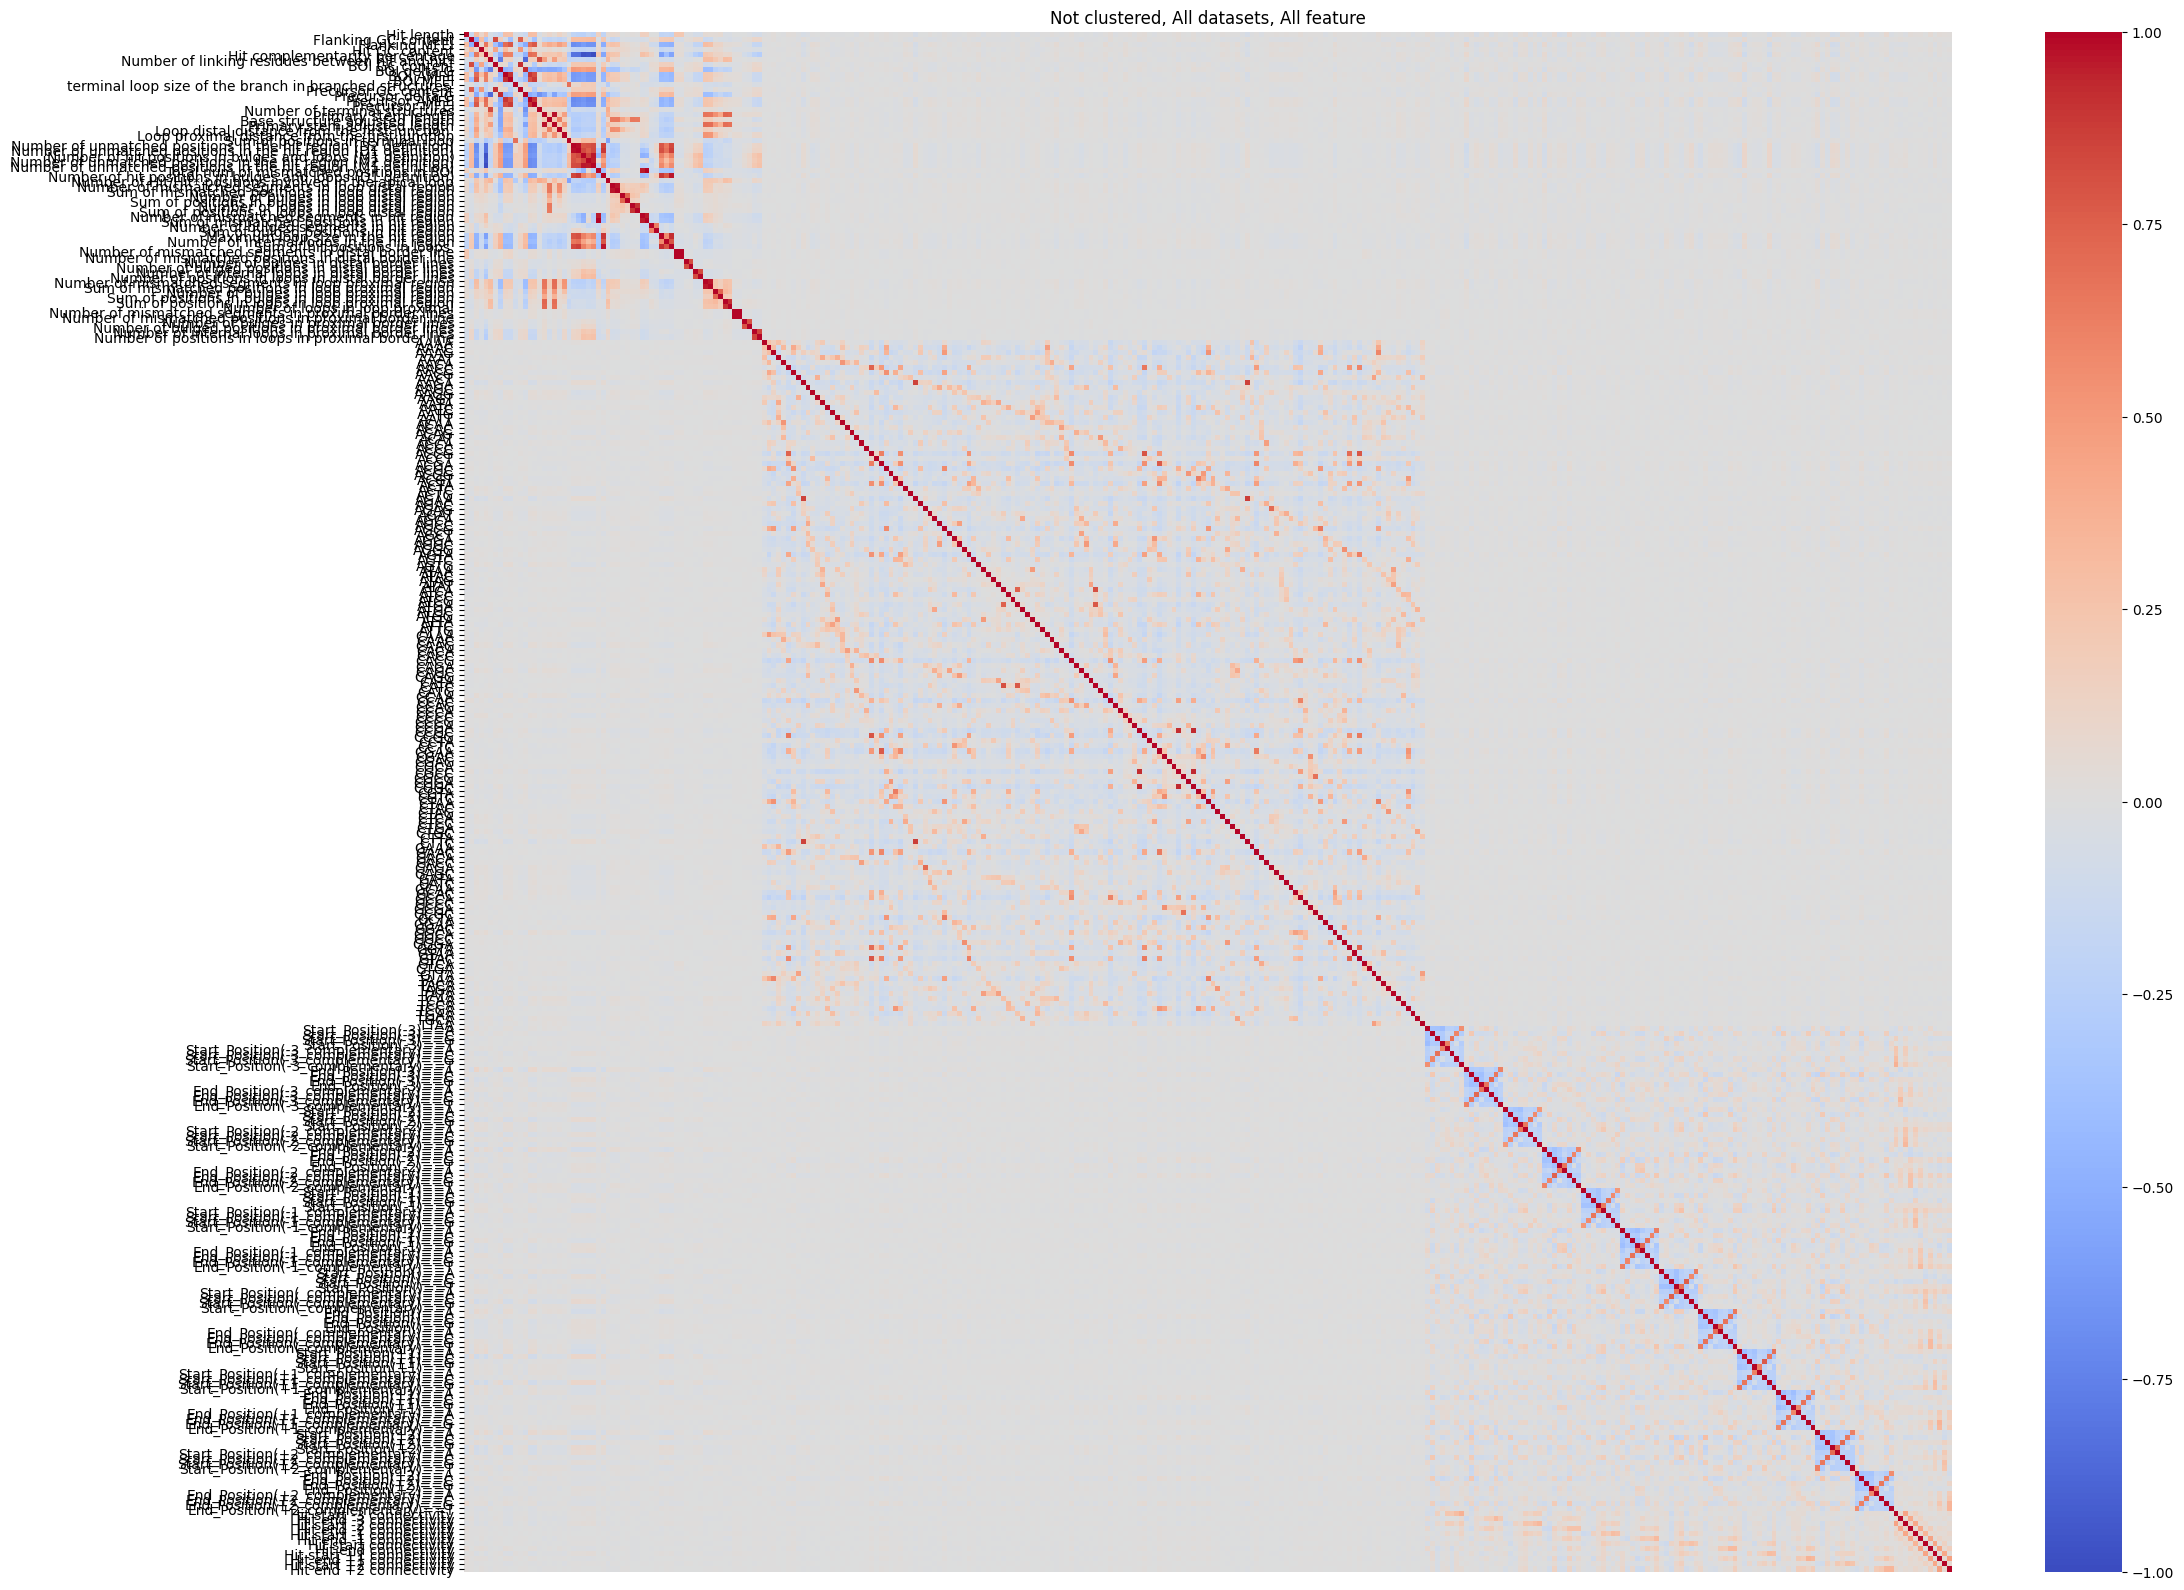

In [13]:
show_heatmap(corr_matrix,title="Not clustered, All datasets, All feature", yticklabels=True, savefig=True)

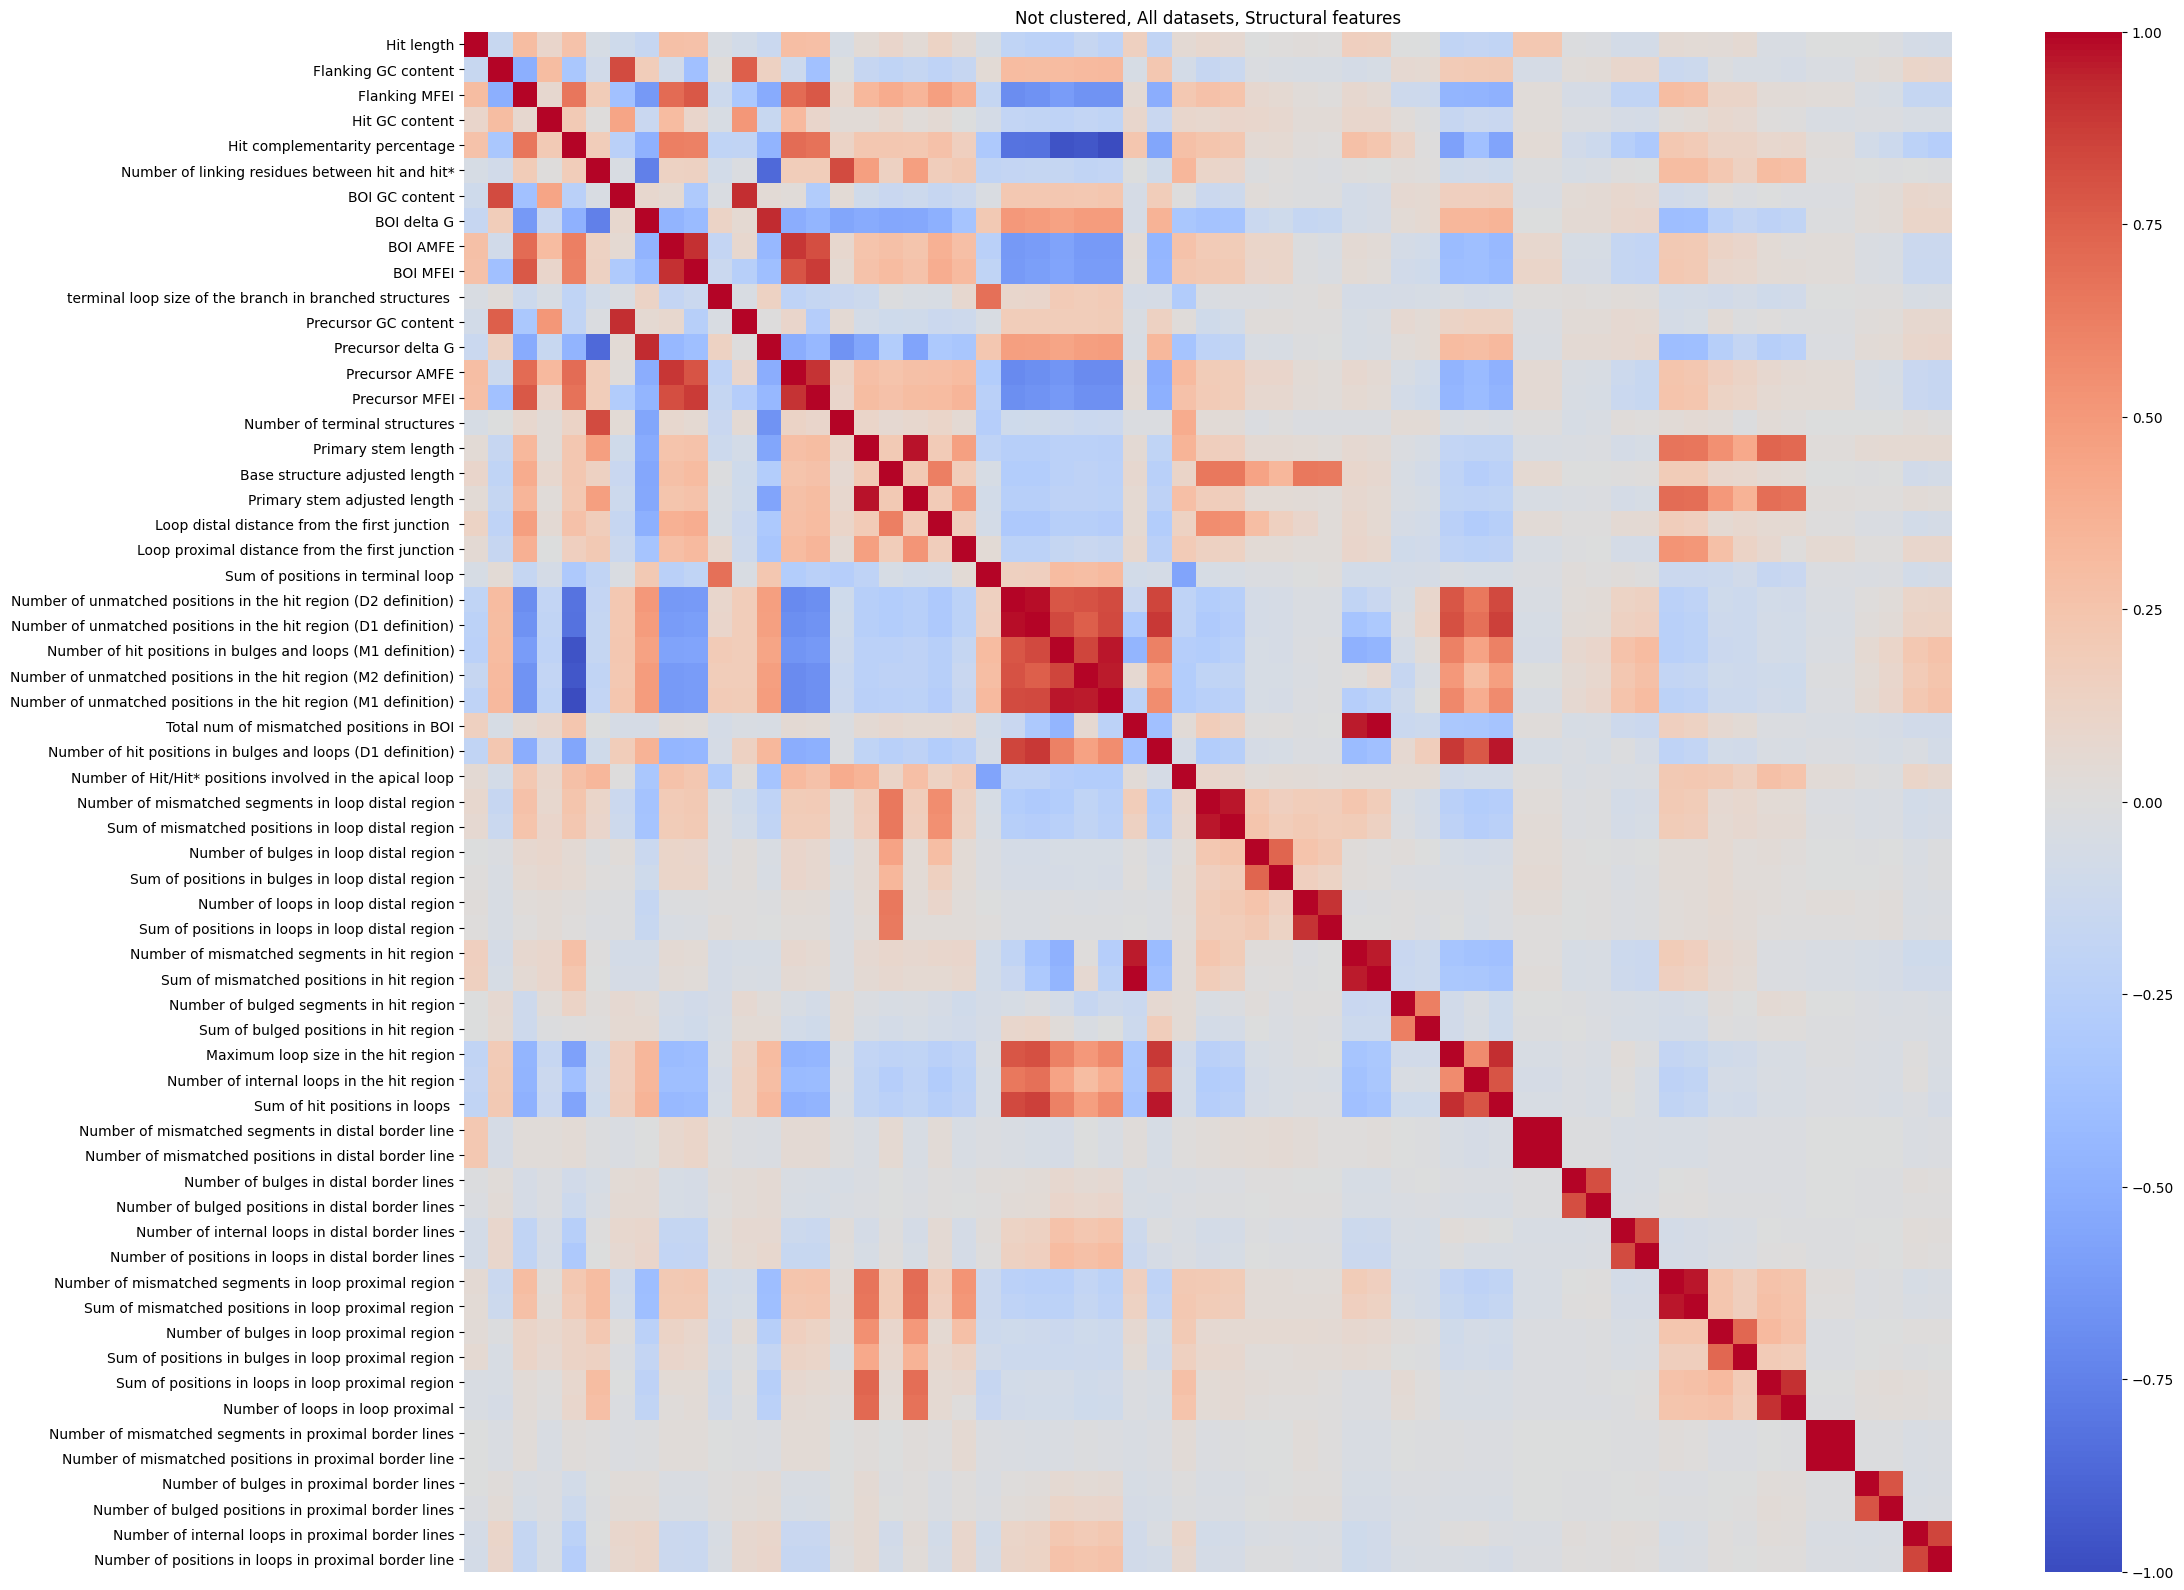

In [14]:
show_heatmap(corr_matrix.iloc[0:61,0:61], "Not clustered, All datasets, Structural features", yticklabels=True, savefig=True)

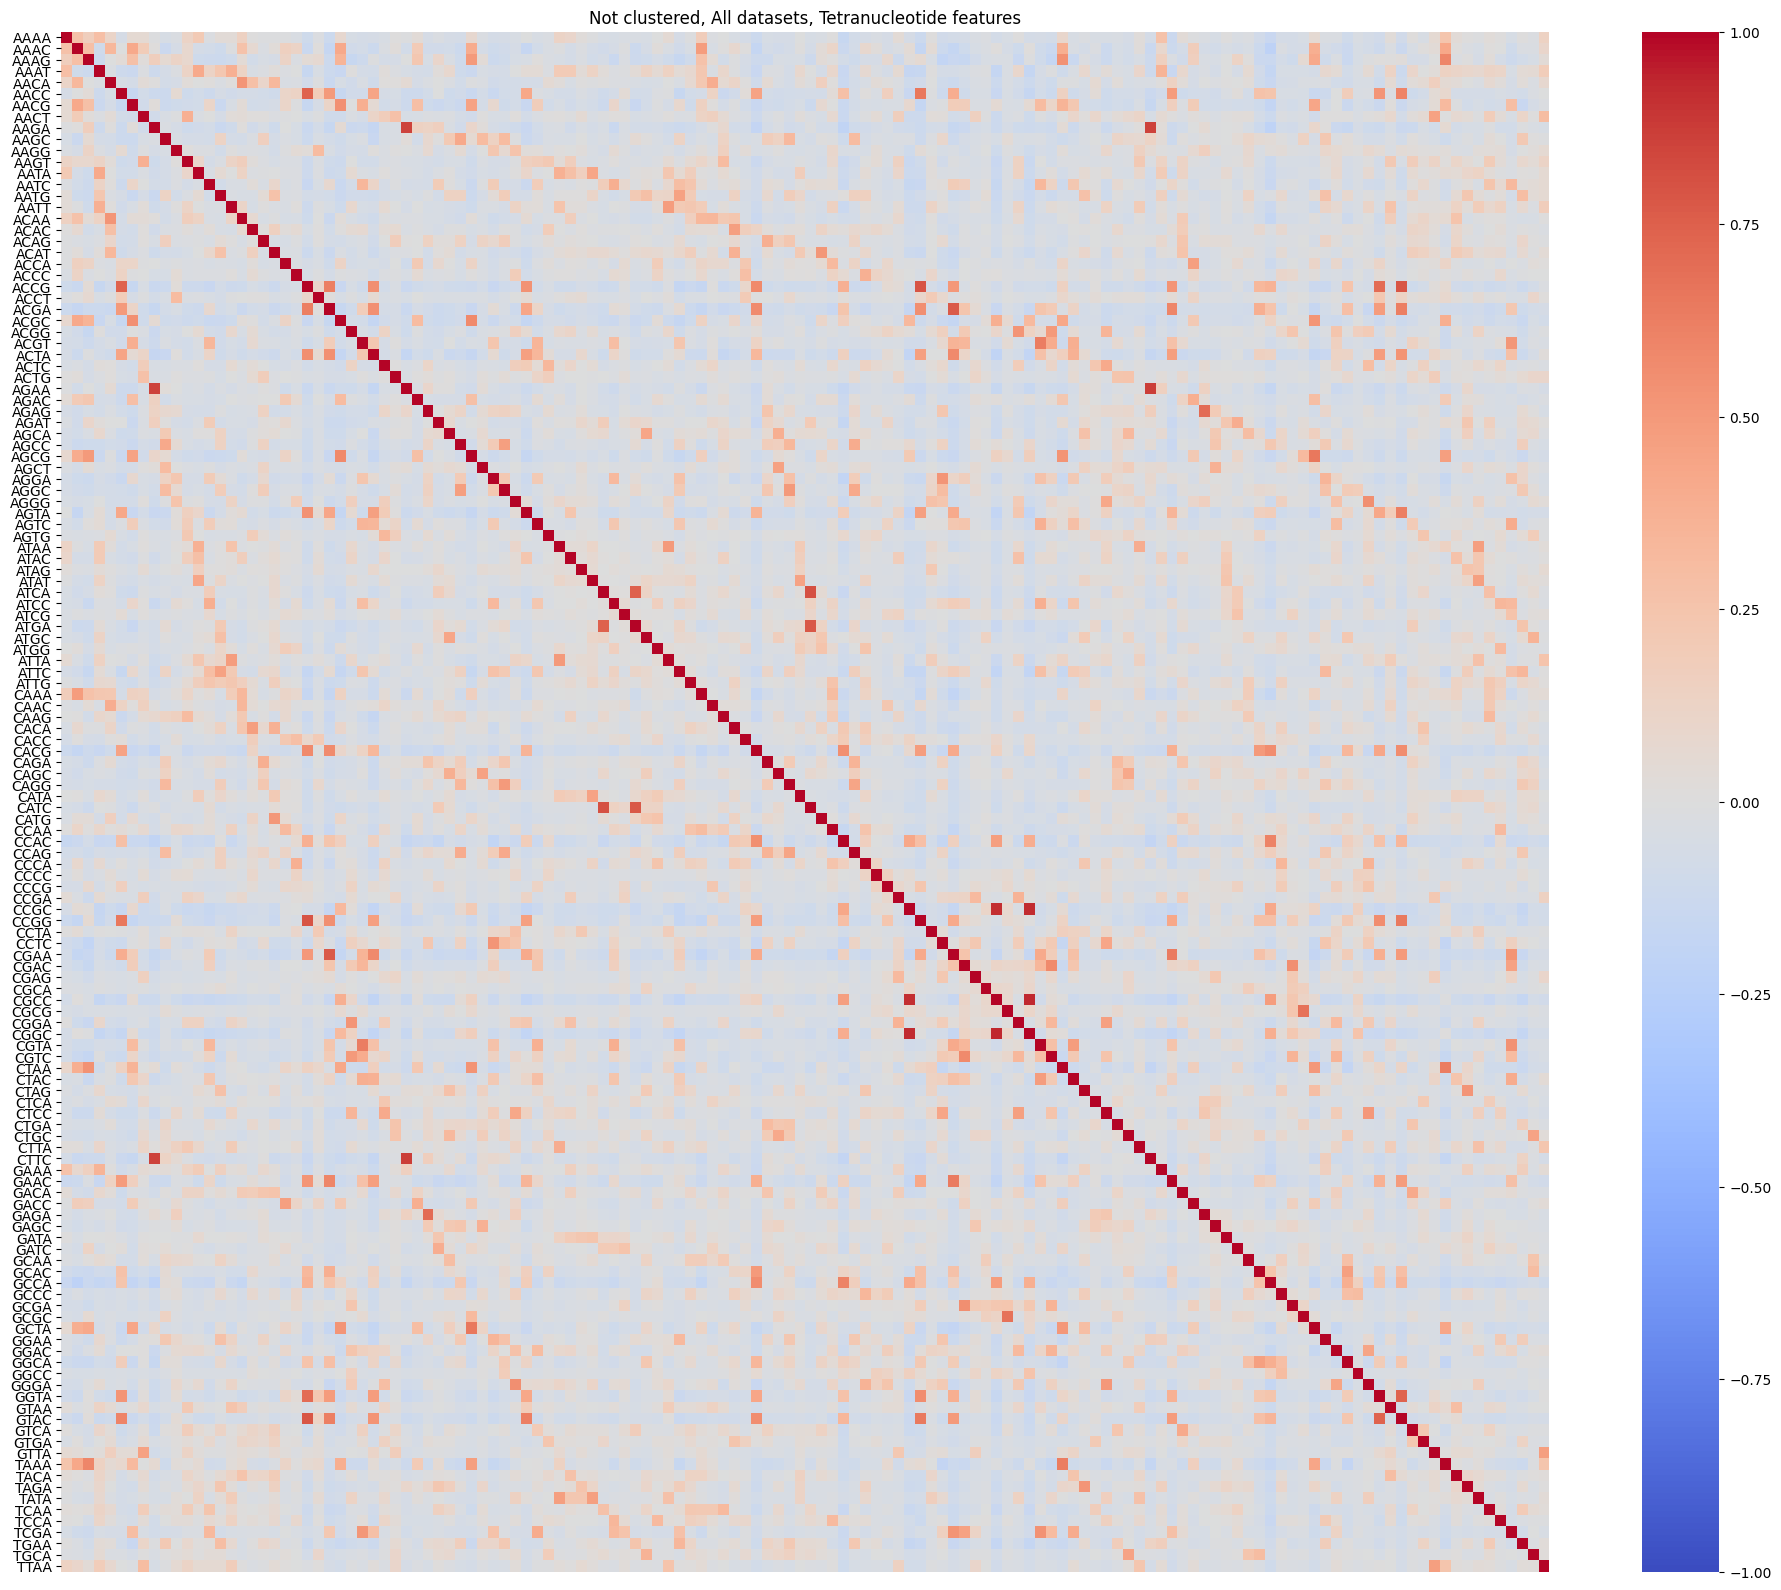

In [15]:
show_heatmap(corr_matrix.iloc[61:197,61:197], "Not clustered, All datasets, Tetranucleotide features", yticklabels=True, savefig=True)

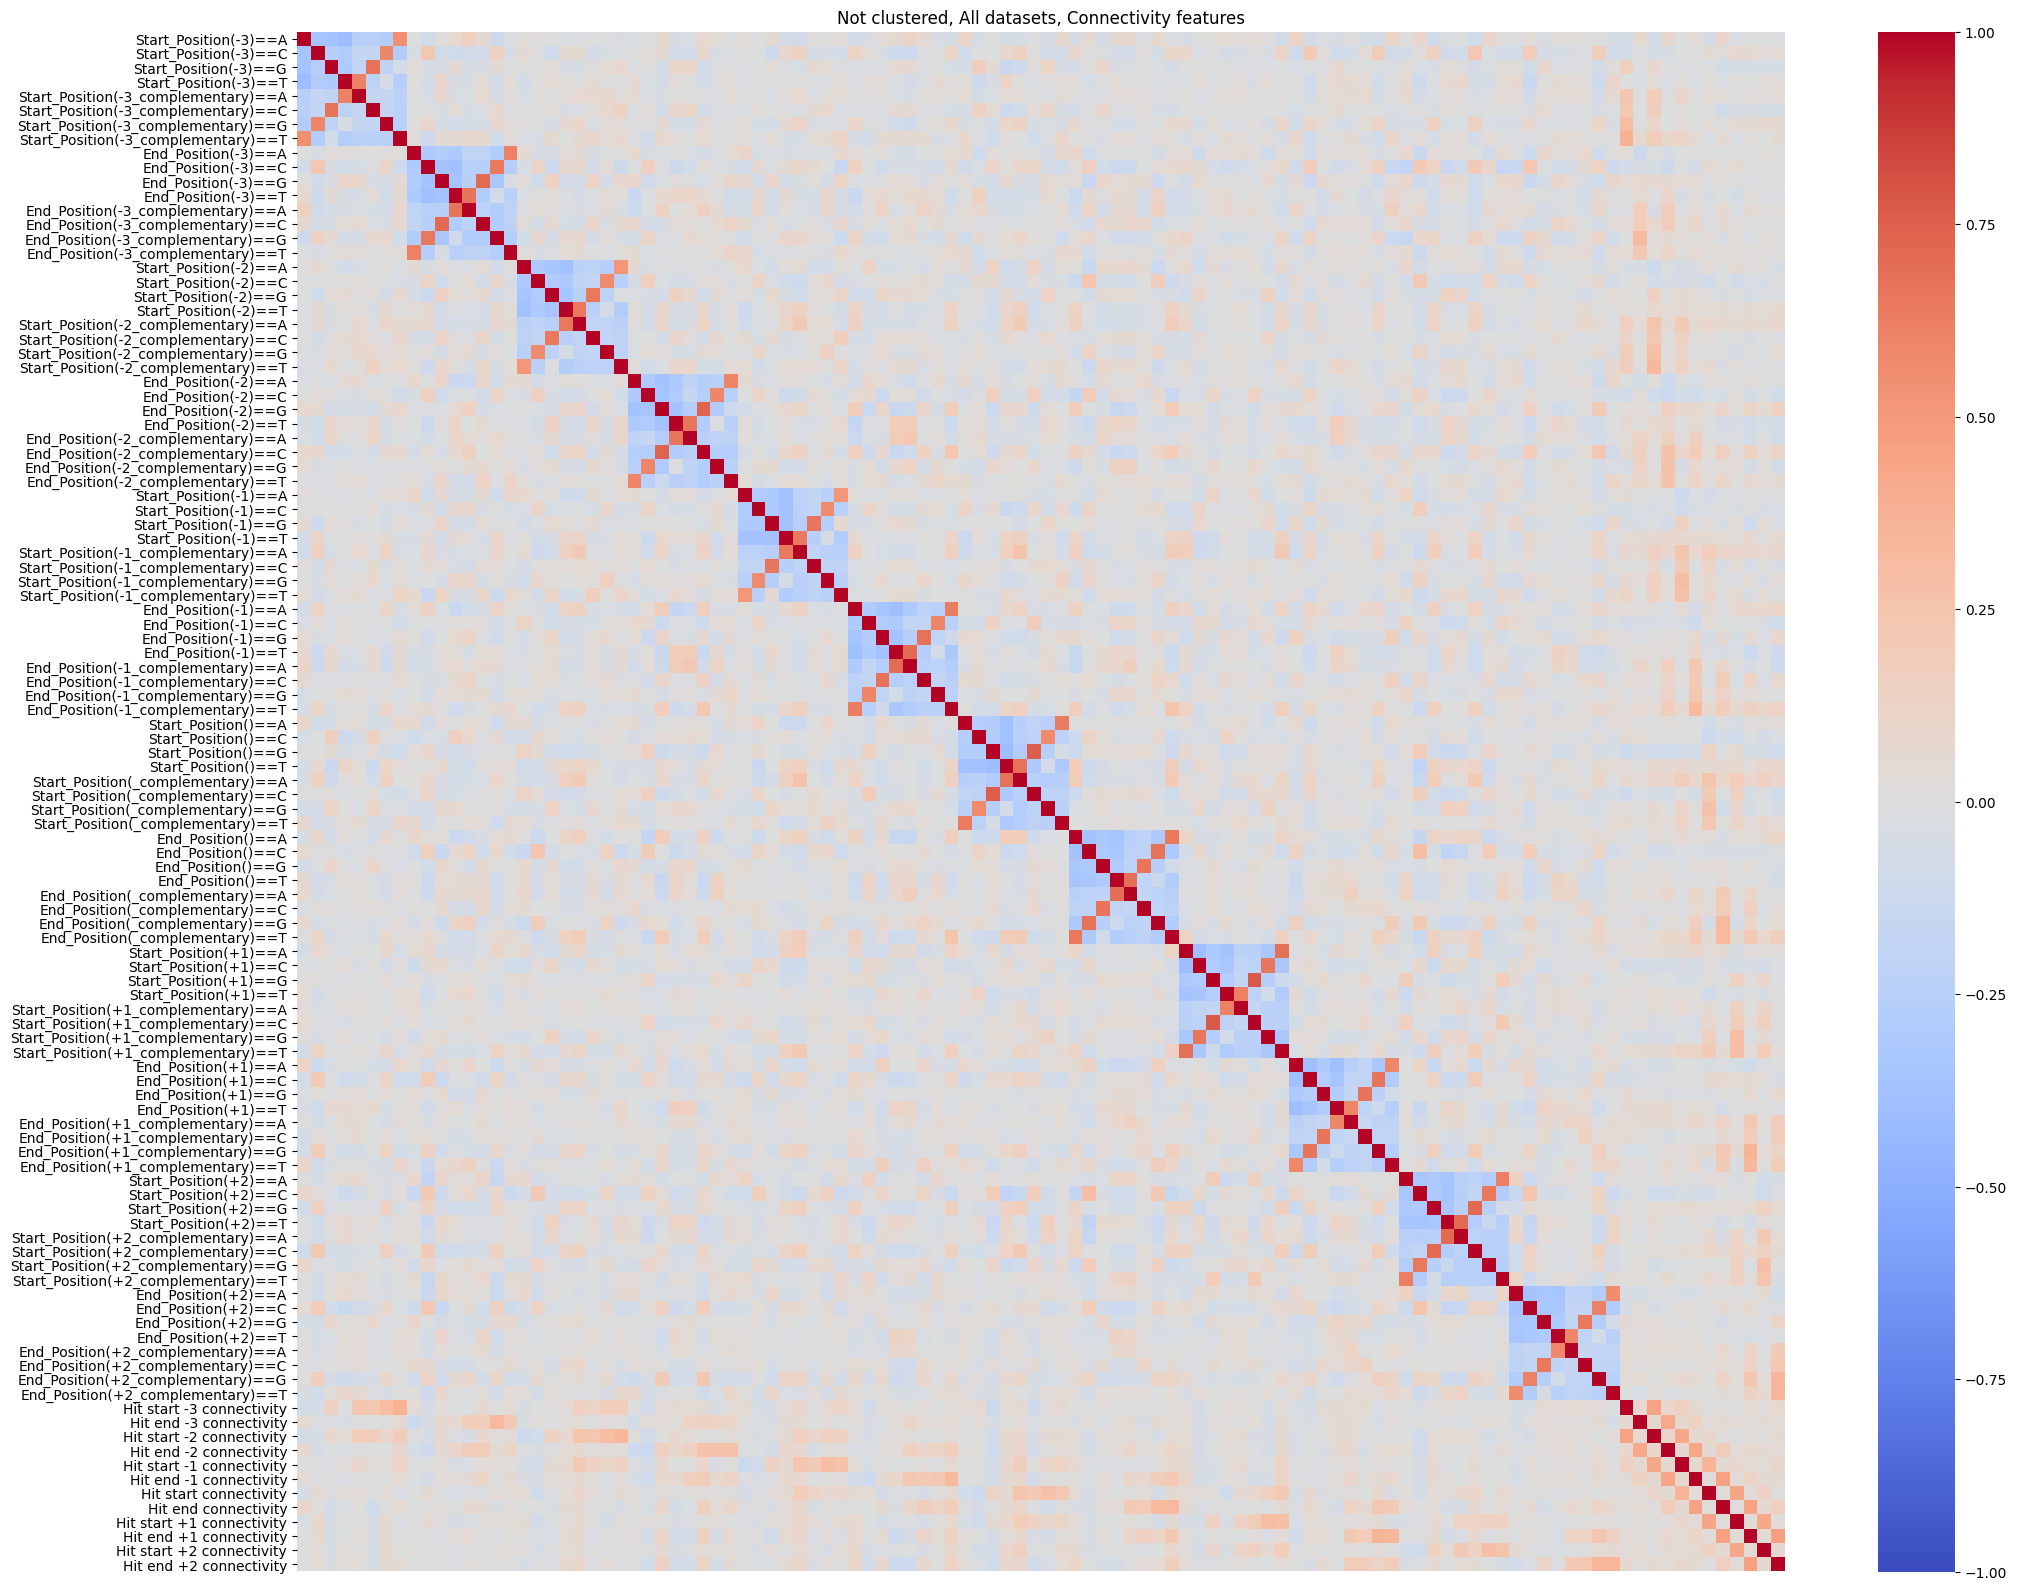

In [16]:
show_heatmap(corr_matrix.iloc[197:,197:], "Not clustered, All datasets, Connectivity features", yticklabels=True, savefig=True)

### bi-clusterd

In [17]:
clusterd_corr = corr_matrix.copy()
# area 1
index_area1 = bi_cluster_sort_arg(clusterd_corr.iloc[0:61,0:61])
clusterd_corr.iloc[0:61,0:61] = clusterd_corr.iloc[index_area1,0:61]
clusterd_corr.iloc[0:61,0:61] = clusterd_corr.iloc[0:61,index_area1]

# area 2
index_area2 = bi_cluster_sort_arg(clusterd_corr.iloc[61:197, 61:197])
index_area2 = [i + 61 for i in index_area2]
clusterd_corr.iloc[61:197, 61:197] = clusterd_corr.iloc[index_area2, 61:197]
clusterd_corr.iloc[61:197, 61:197] = clusterd_corr.iloc[61:197, index_area2]

# area 3
index_area3 = bi_cluster_sort_arg(clusterd_corr.iloc[197:, 197:])
index_area3 = [i + 197 for i in index_area3]
clusterd_corr.iloc[197:, 197:] = clusterd_corr.iloc[index_area3, 197:]
clusterd_corr.iloc[197:, 197:] = clusterd_corr.iloc[197:, index_area3]

/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:1184: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout(**tight_params)
/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


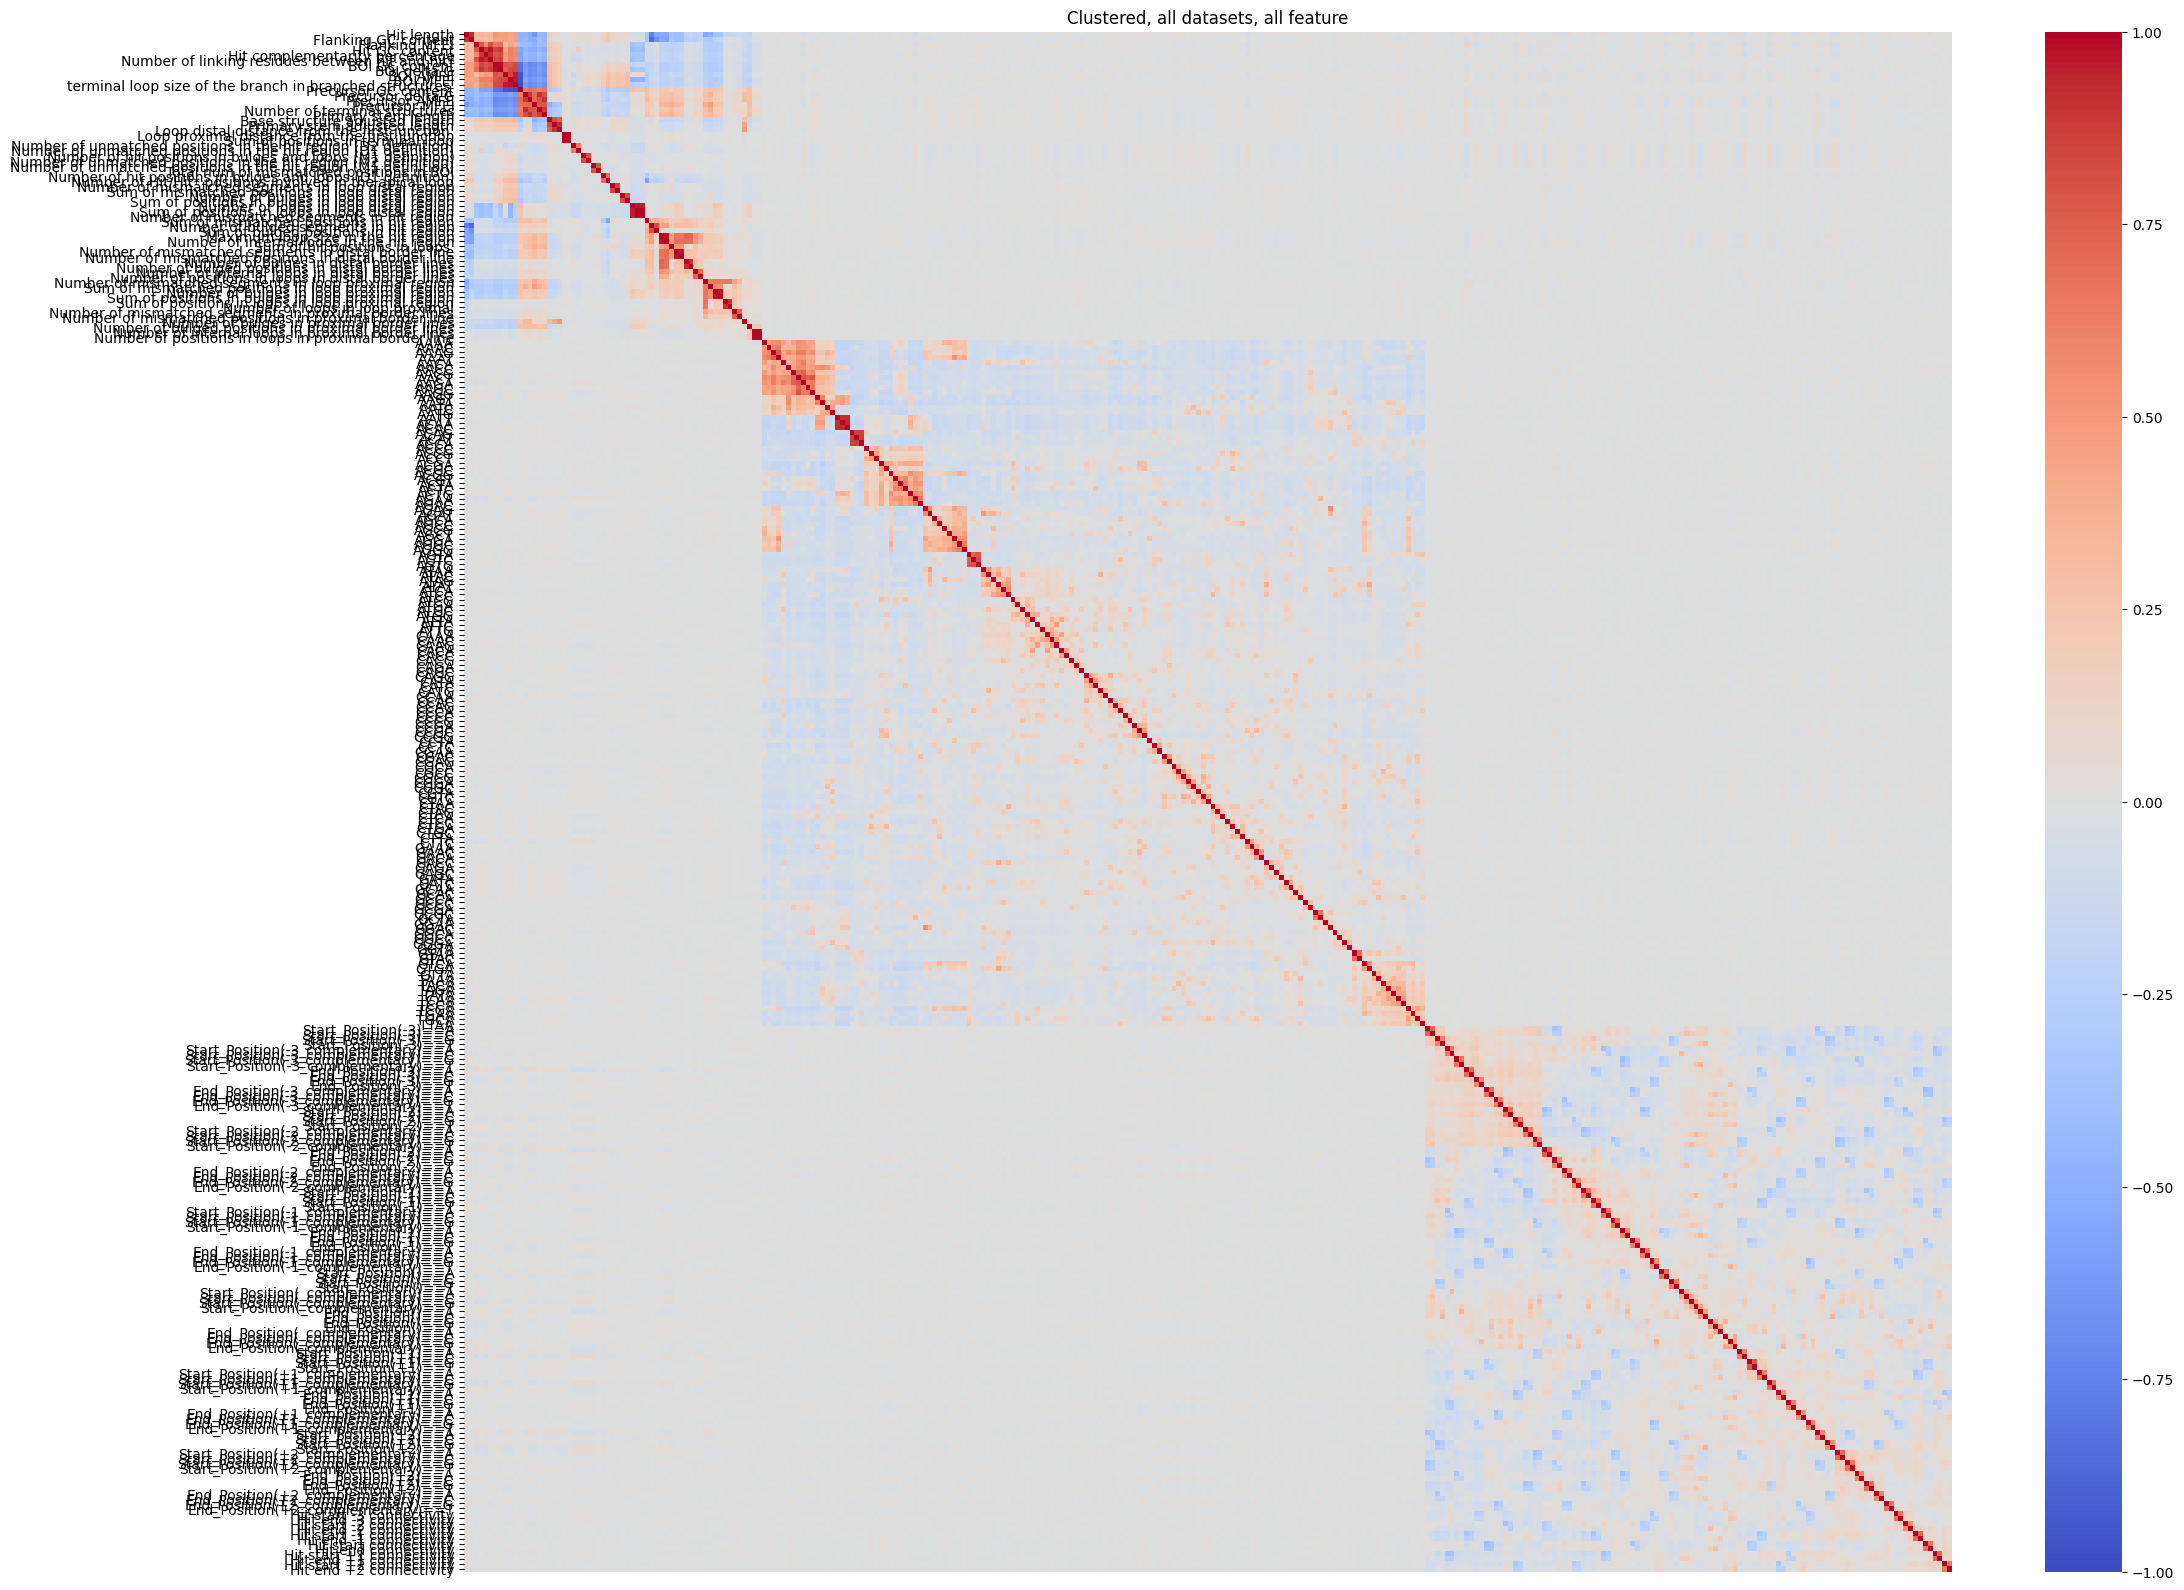

In [18]:
show_heatmap(clusterd_corr, title="Clustered, all datasets, all feature", yticklabels=True, savefig=True)

/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:1184: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout(**tight_params)


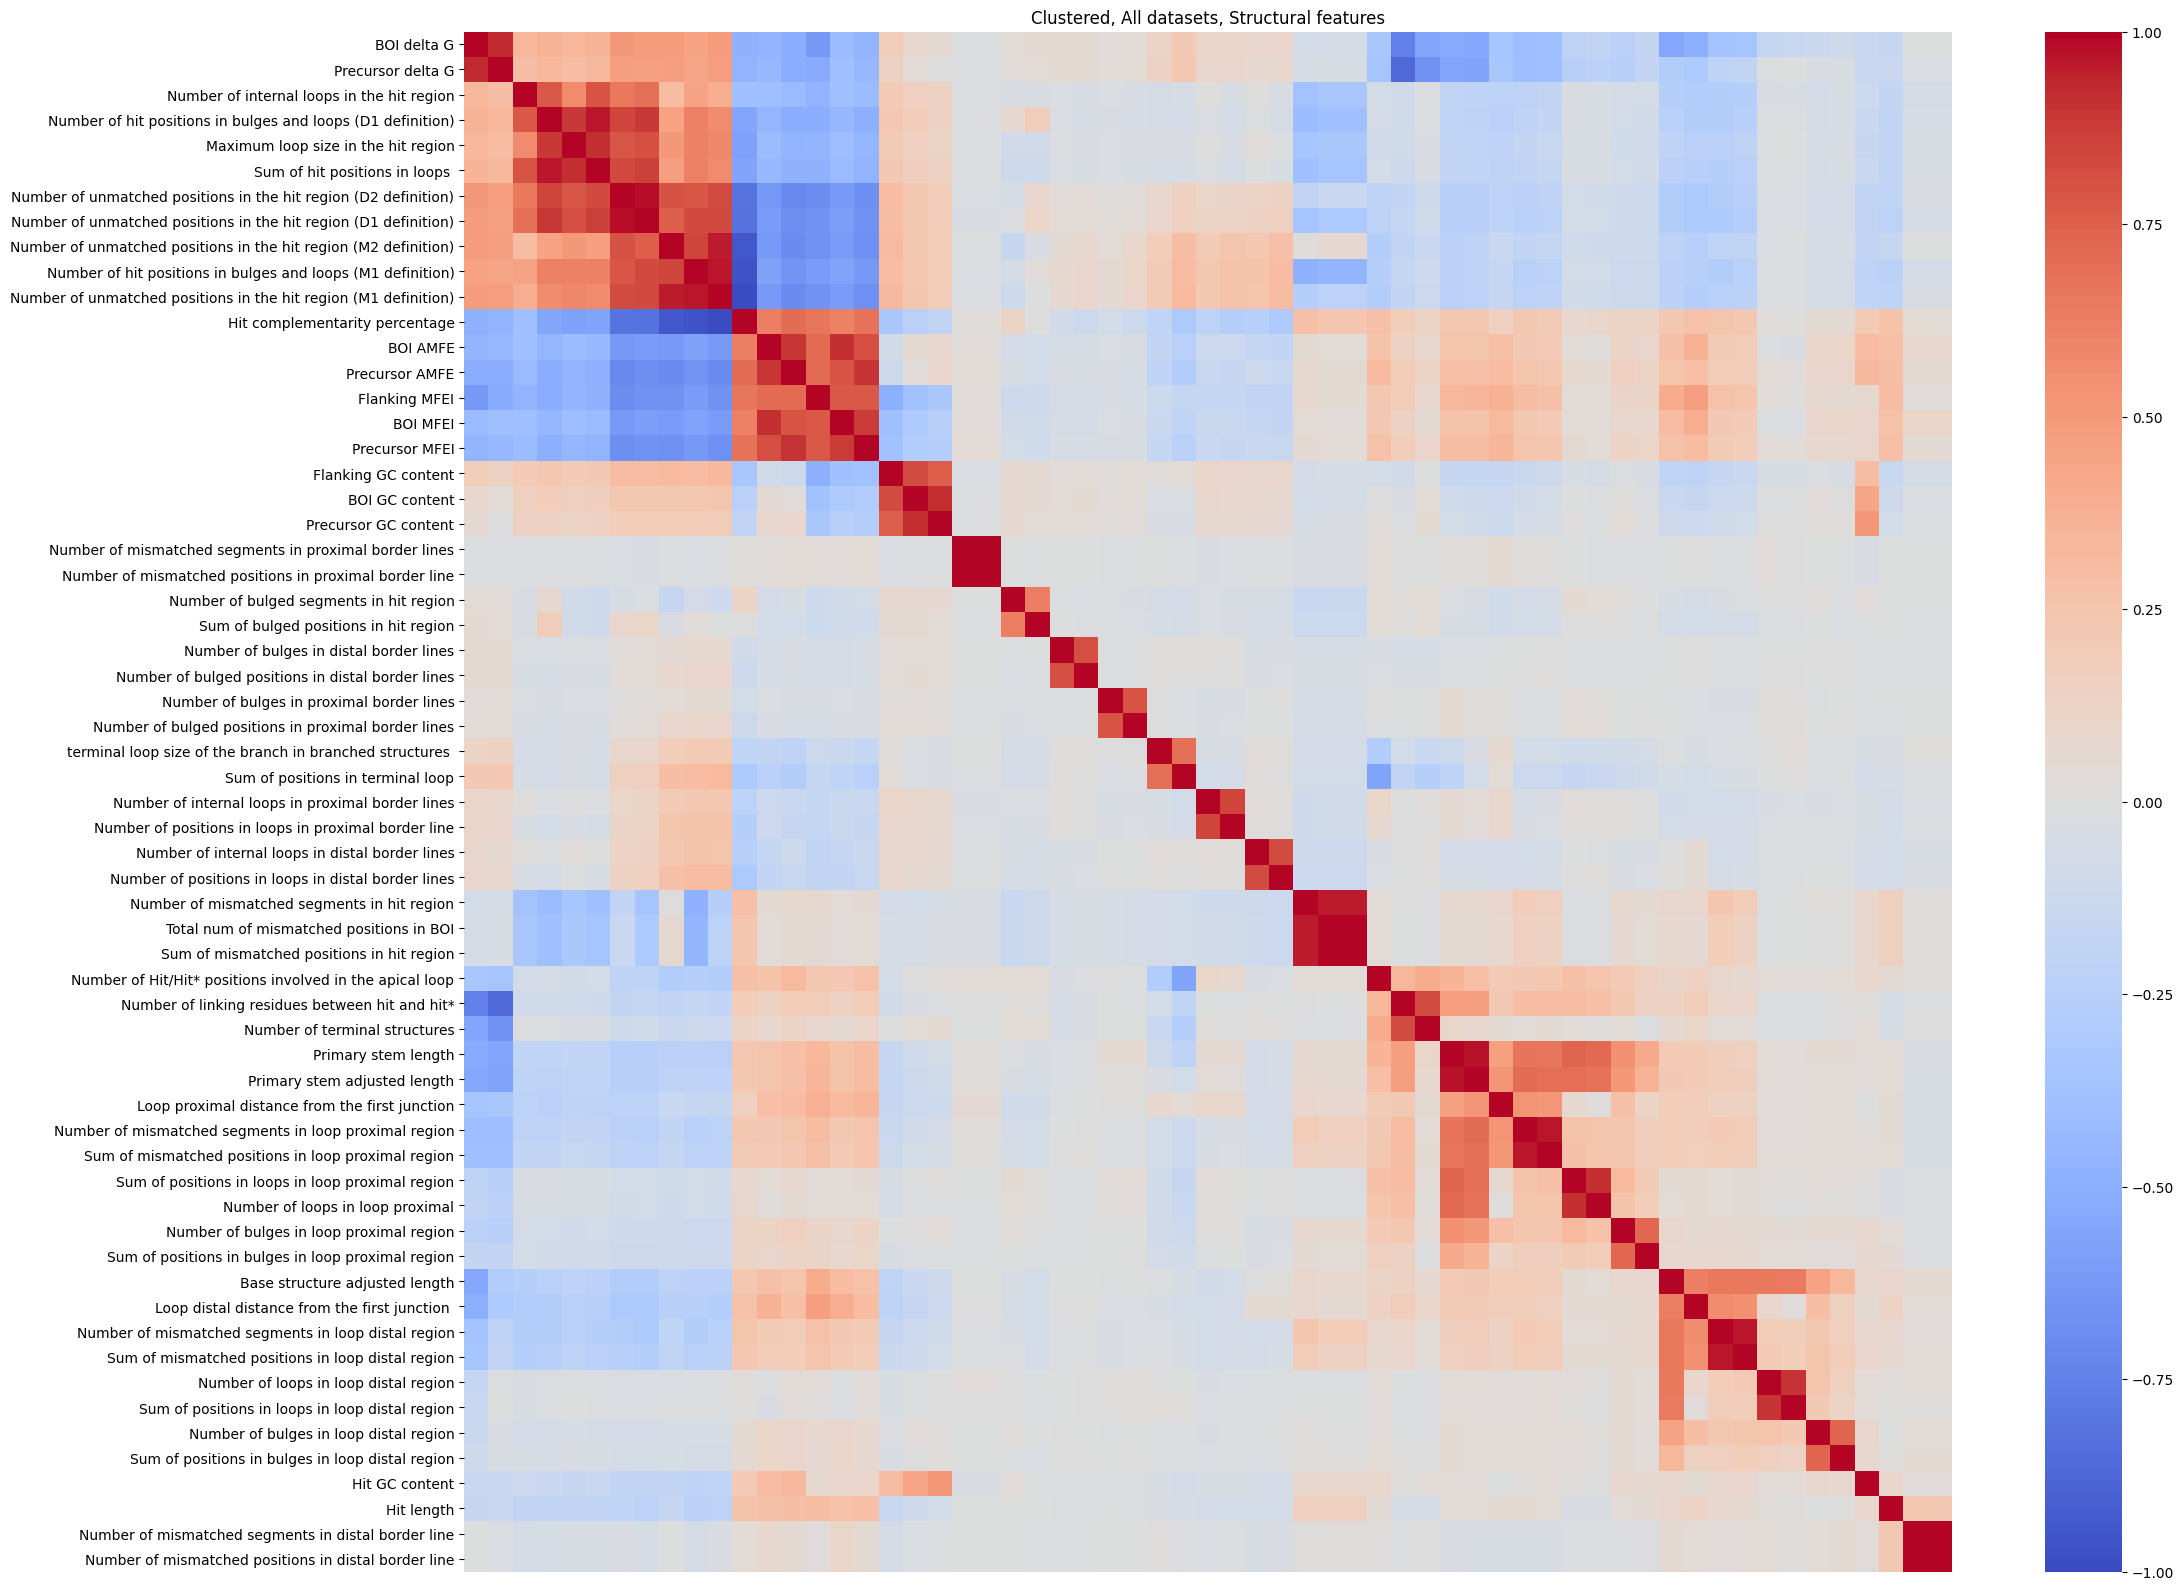

In [19]:
temp = corr_matrix.iloc[0:61,0:61].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Structural features", yticklabels=True, savefig=True)

/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:1184: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout(**tight_params)


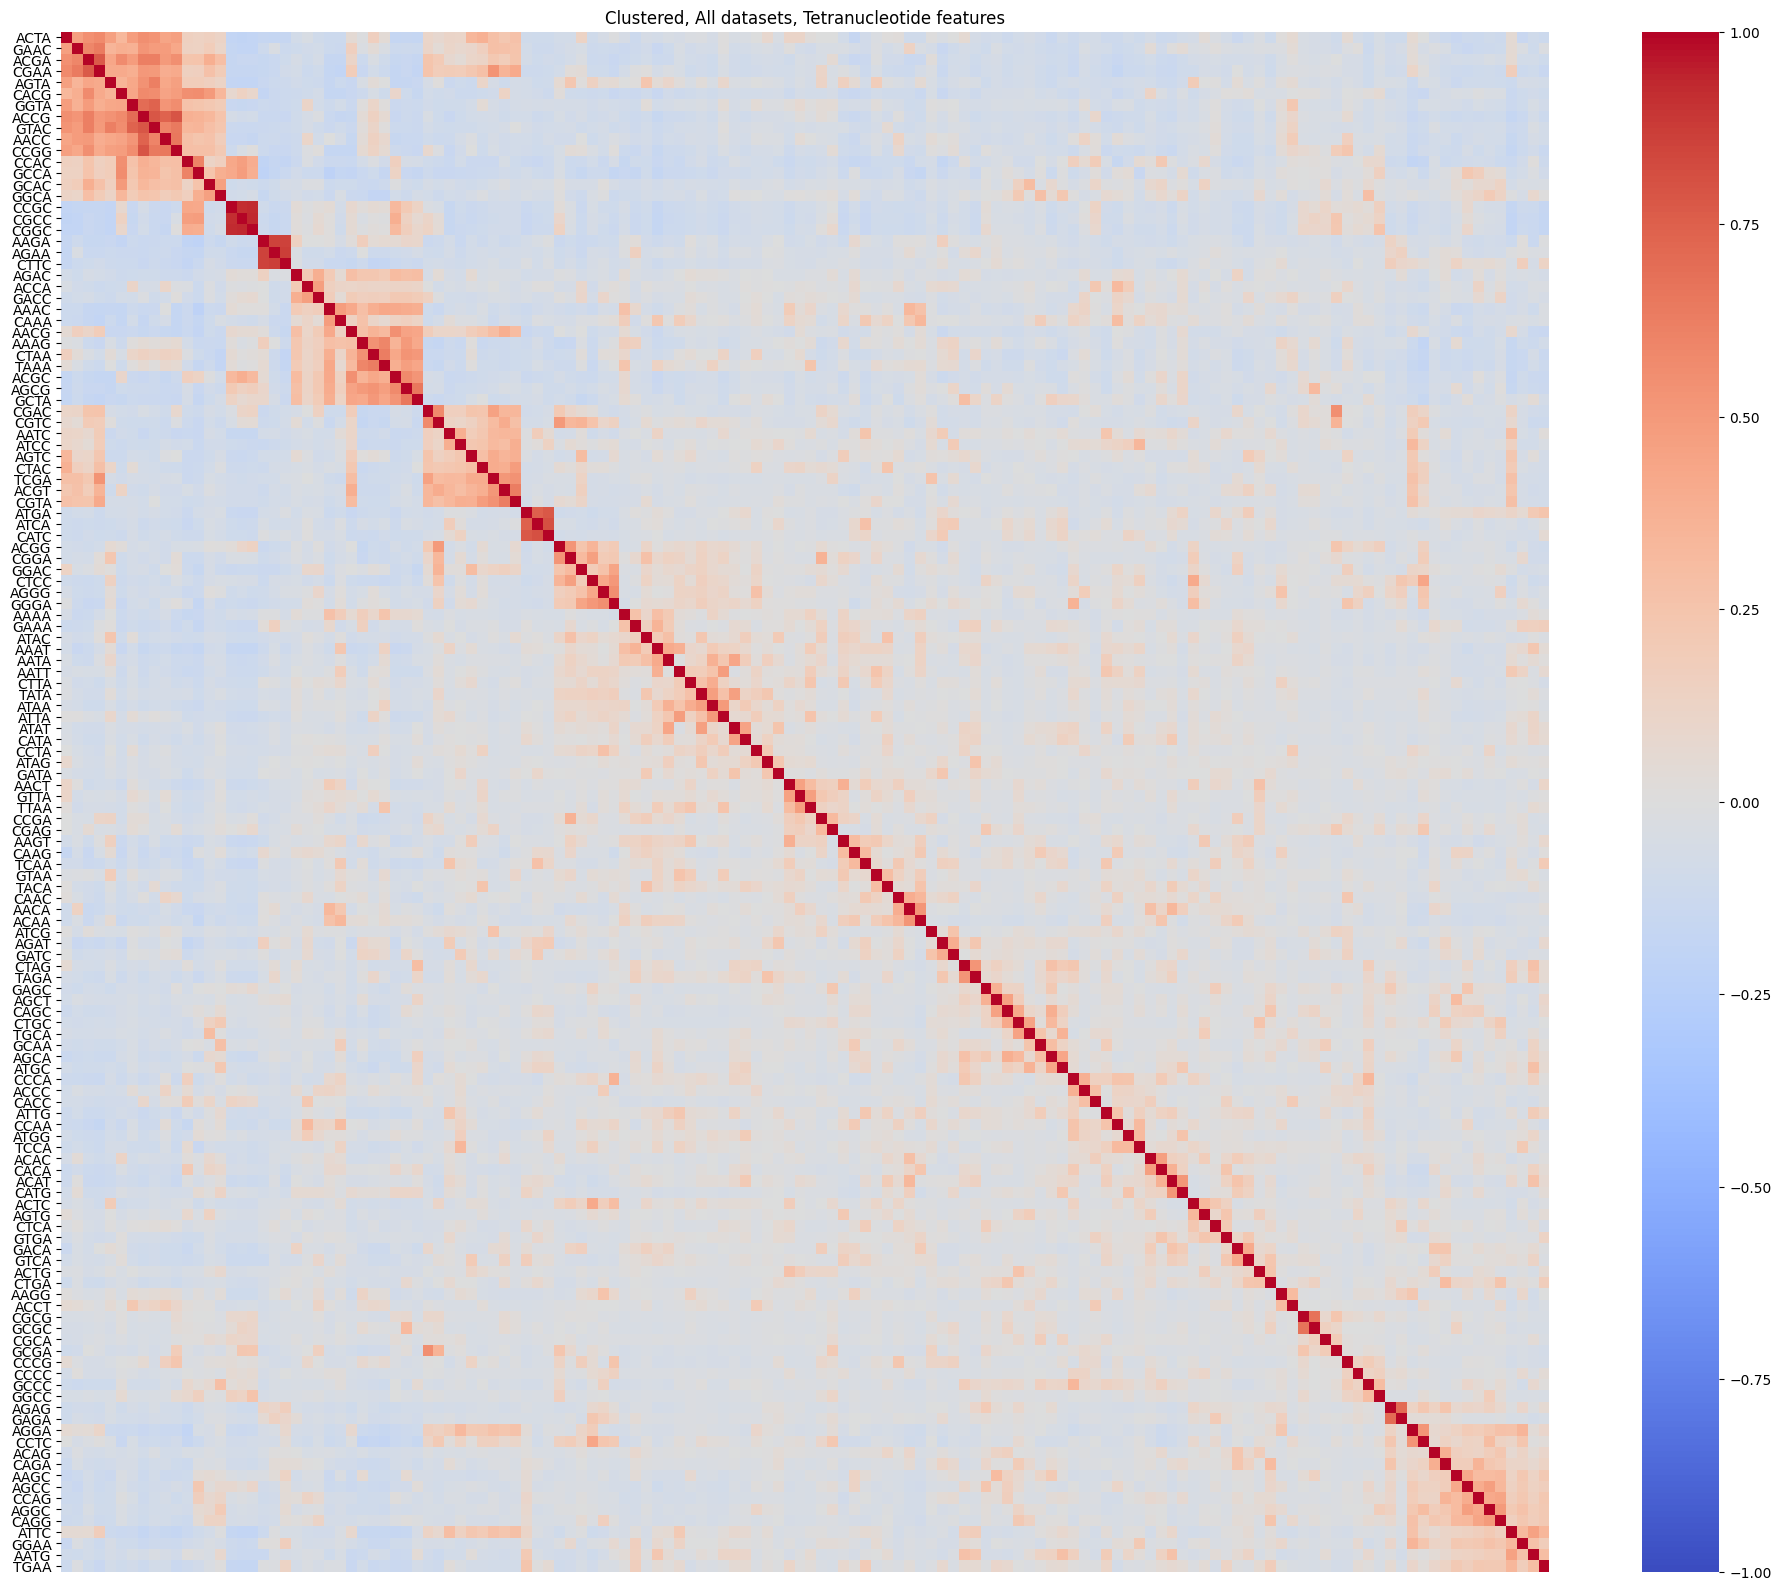

In [20]:
temp = corr_matrix.iloc[61:197, 61:197].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Tetranucleotide features", yticklabels=True, savefig=True)

/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ubuntu/Desktop/Storage/Projects/Ataie/amir-p3/venv/lib/python3.11/site-packages/seaborn/matrix.py:1184: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout(**tight_params)


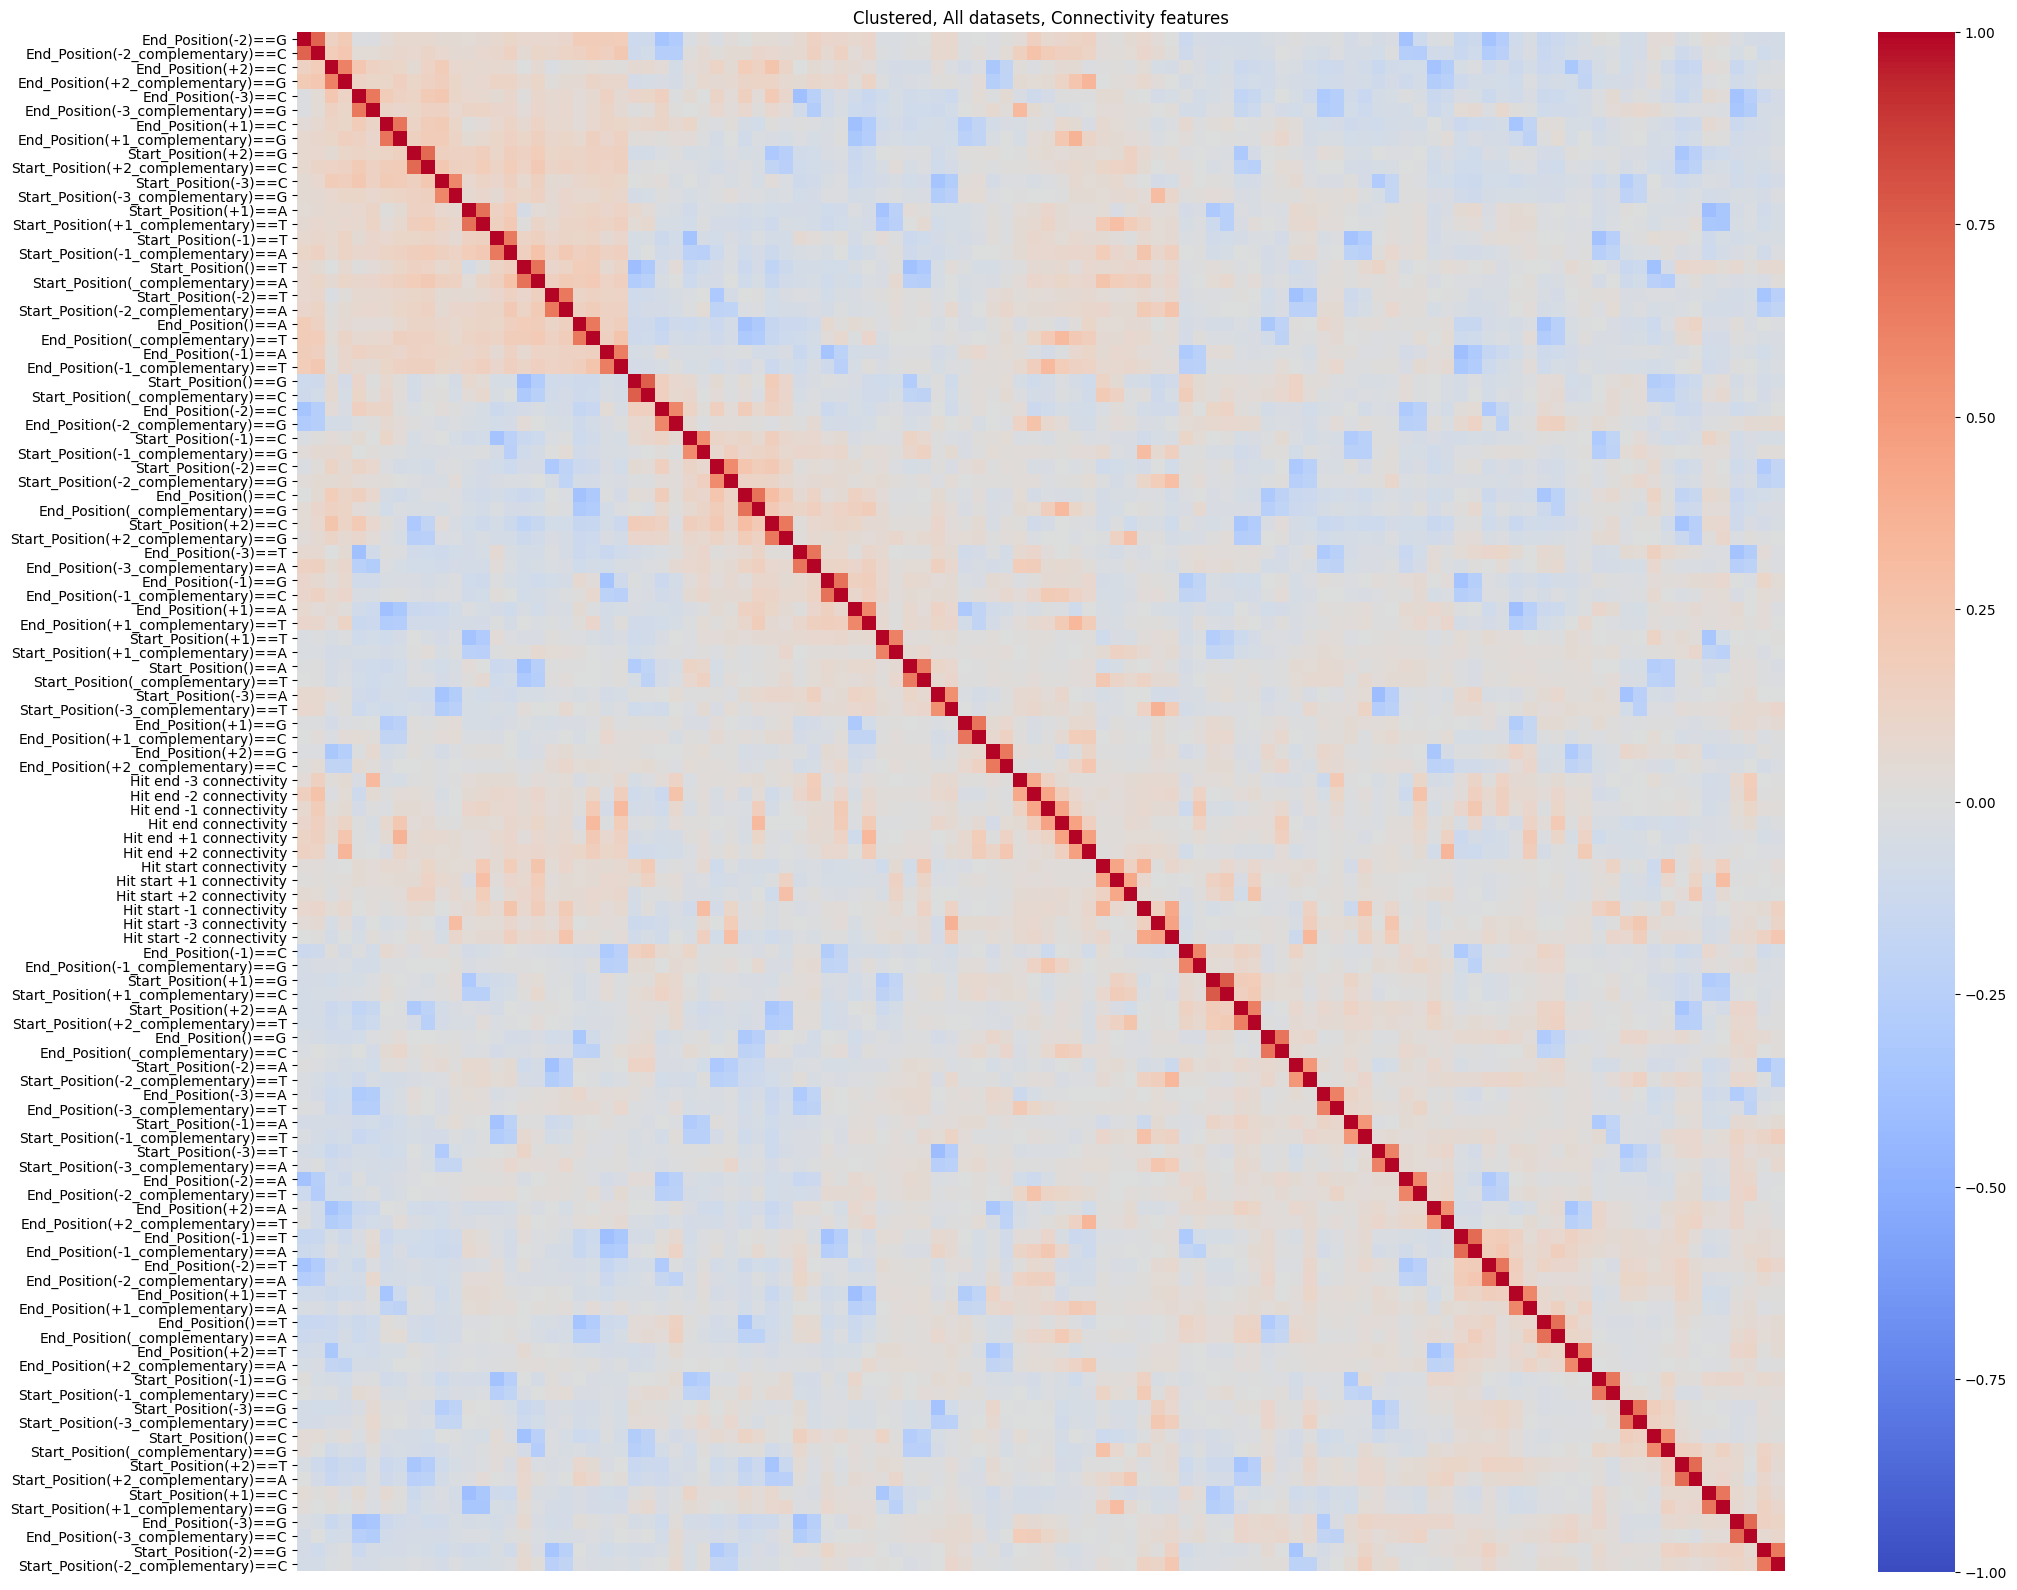

In [21]:
temp = corr_matrix.iloc[197:,197:].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Connectivity features", yticklabels=True, savefig=True)